## Apiux & SII: Propagacion de contaminacion de contribuyentes bajo 3 definicions de fuerza

## Henry Vega (henrry.vega@api-ux.com)
## Data scientist

<span style="color:red">-----------------------------------------------------------------------------------------------------------------------------------------</span>

Se ejecutaron algoritmos para buscar bajo una serie 15 iteraciones, en tres escenarios de fuerza diferentes:
    
**1.-Fuerza correspondiente a la fraccion de IVA de un contribuyente A en un contribuyente B respecto al total de IVA de todos los contribuyente emisores sobre B.**

**2.-Fuerza correspondiente al promedio de la fraccion de monto de IVA de un contribuyente A con respecto al total y de la fraccion de documentos emitidos en un contribuyente A respecto al total considerando si B tenia como representante legal una persona contaminada.** 

**3.- Una fuerza promedio de las dos fuerzas anteriormente definidas.**

A partir de estas fuerzas se ejecutaron algoritmos ante lo cual se encontraron diferentes poblaciones de entidades contaminadas. 

## Propagacion de contaminacion basado solo en IVA

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
df1 = pd.read_csv("~/data/processed/contaminados_processed_iva.csv")

In [7]:
df1['score'][df1['score']>0].describe()

count    4.305873e+06
mean     6.889945e-02
std      5.962251e-02
min      5.496027e-06
25%      5.239466e-02
50%      5.799685e-02
75%      6.724050e-02
max      1.000325e+00
Name: score, dtype: float64

Anlicemos todos los valores mayores que cero, que serian los encontrados. Vemos que la curva de distribucion de valores tiene una media y mediana muy bajas, incluso el tercer cuartil es muy cercano a cero.

<Axes: xlabel='score', ylabel='Density'>

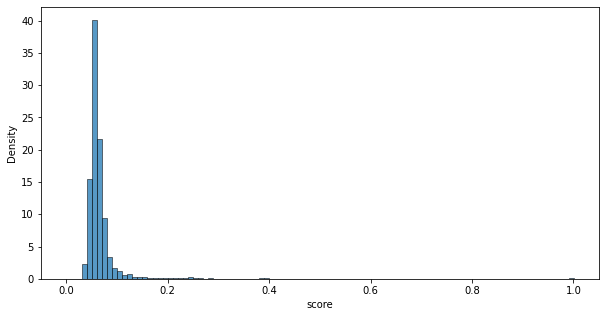

In [6]:
plt.rcParams["figure.figsize"]=10,5
sns.histplot(x=df1['score'][df1['score']>0], stat="density", bins=100, edgecolor='black')

El grafico de distribucion muestra claramente esta situacion. En su mayoria los valores de contaminacion transmitida es cercana a cero.

## Propagacion de contaminacion basado en fraccion de IVA y contaminacion asociada a transaccion con representante contaminado

In [9]:
df2 = pd.read_csv("~/data/processed/contaminados_processed_representante.csv")
df2['score'][df2['score']>0].describe()

count    3.302000e+03
mean     1.341092e-01
std      2.648089e-01
min      3.154197e-12
25%      2.507593e-04
50%      9.177406e-03
75%      1.111111e-01
max      1.000101e+00
Name: score, dtype: float64

Vemos que en este caso es mucho menor la contaminacion a entidades cercanas comercialmente, esto se debe a que en comparacion con el escenario anterior, las fuerzas diferentes de cero. 

<Axes: xlabel='score', ylabel='Density'>

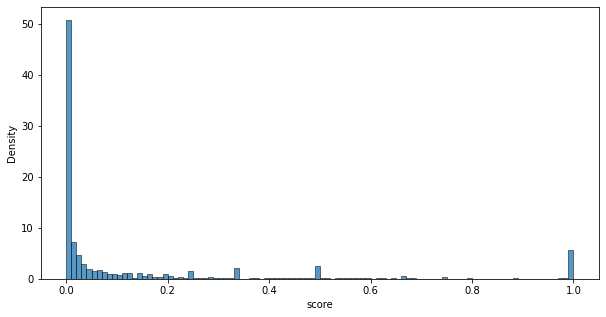

In [10]:
sns.histplot(x=df2['score'][df2['score']>0], stat="density", bins=100, edgecolor='black')

Se evidencia en la distribucion de valores que la gran mayoria de valores encontrados son cercanos a cero.

## Propagacion de contaminacion basado tanto en IVA como contaminacion asociada a transaccion con representante contaminado

In [11]:
df3 = pd.read_csv("~/data/processed/contaminados_processed_iva_representante.csv")
df3['score'][df3['score']>0].describe()

count    4.308497e+06
mean     3.773635e-02
std      5.881050e-02
min      5.566891e-06
25%      2.249276e-02
50%      2.695641e-02
75%      3.515471e-02
max      1.000386e+00
Name: score, dtype: float64

Podemos ver que como en este caso se uso una fuerza promedio entre las dos anteriores, el comportamiento es similar al caso de la fuerza de solo IVA, pues la cantidad de registros de fuerza es mucho mayor. 

<Axes: xlabel='score', ylabel='Density'>

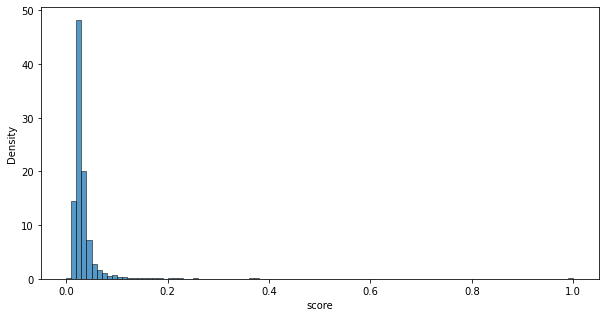

In [12]:
sns.histplot(x=df3['score'][df3['score']>0], stat="density", bins=100, edgecolor='black')

En este caso vemos que nuevamente la fuerza de IVA es predominante y por lo tanto, a pesar de ser la mayoria de los valores cercanos a cero, mas valores mayores a 0.5 aparecen. 

## Distribucion para scoring mayores que 0.5

###  Fuerza de solo IVA.

<Axes: xlabel='score', ylabel='Density'>

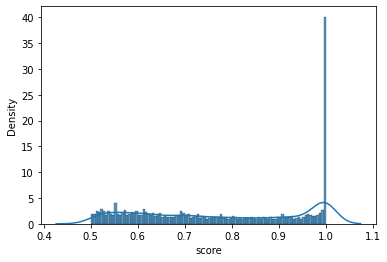

In [9]:
sns.kdeplot(df1['score'][df1['score']>=0.5])
sns.histplot(x=df1['score'][df1['score']>=0.5], stat="density", bins=100, edgecolor='black')


In [10]:
df1['score'][df1['score']>=0.5].describe()

count    17911.000000
mean         0.777845
std          0.174151
min          0.500028
25%          0.613254
50%          0.770217
75%          0.969538
max          1.000325
Name: score, dtype: float64

Es decir, hay 15710 constribuyentes contaminados con valores de contaminacion mayores o iguales a 0.5

### Fuerza de solo contaminacion asociada a transaccion con representante contaminado.

<Axes: xlabel='score', ylabel='Density'>

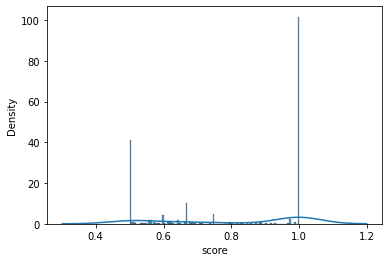

In [11]:
sns.kdeplot(df2['score'][df2['score']>=0.5])
sns.histplot(x=df2['score'][df2['score']>=0.5], stat="density", bins=100, edgecolor='black')

In [12]:
df2['score'][df2['score']>=0.5].describe()

count    366.000000
mean       0.810674
std        0.215254
min        0.500000
25%        0.573107
50%        0.998516
75%        1.000000
max        1.000101
Name: score, dtype: float64

Es decir, hay 10198 constribuyentes contaminados con valores de contaminacion mayores o iguales a 0.5

### Fuerza promedio de fuerzas previas (IVA + contaminacion asociada a transaccion con representante contaminado).

<Axes: xlabel='score', ylabel='Density'>

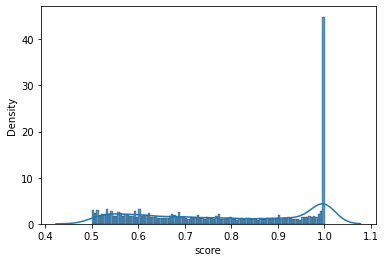

In [13]:
sns.kdeplot(df3['score'][df3['score']>=0.5])
sns.histplot(x=df3['score'][df3['score']>=0.5], stat="density", bins=100, edgecolor='black')

In [14]:
df3['score'][df3['score']>=0.5].describe()

count    15710.000000
mean         0.783062
std          0.176817
min          0.500000
25%          0.612993
50%          0.779139
75%          0.984461
max          1.000386
Name: score, dtype: float64

A partir de los modelos desarrollados, se puede concluir que el modelo de promedio de fuerzas tiene la suma de las capacidades de cada modelo con cada fuerza por separado para propagar contaminacion. Por otro lado, presenta una leve mejora en relacion al total de entidades a las cuales se les propaga contaminacion, sin embargo, la cantidad de valores de contaminacion mayor o igual a 0.5 son menores en cantidad en comparacion a la suma de valores encontrado en cada modelo de fuerza por separado. 